<a href="https://colab.research.google.com/github/miguelmota2301/ciencia_de_dados/blob/main/Pr%C3%A1tica_4_Classifica%C3%A7%C3%A3o_e_Reamostragem_16_05_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Miguel Feliciano Mota Alves

# Classificação

## Regressão Logística


### Importando bibliotecas
Vamos importar as mesmas bibliotecas que já vimos anteriormente.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Os comandos do sklearn que serão diferentes:

In [ ]:
# função para normalizar os dados
from sklearn.preprocessing import StandardScaler

# função para separar treino e teste
from sklearn.model_selection import train_test_split

# função para obter a acurácia do modelo
from sklearn.metrics import accuracy_score

# função para obter a matriz de confusão
from sklearn.metrics import confusion_matrix

# função para obter o relatório de classificação
from sklearn.metrics import classification_report

# Regressão Logística
from sklearn.linear_model import LogisticRegression

### Dataset
Hoje, vamos utilizar o *toy dataset* de [Câncer de Mama](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). É um dataset que tem como atributo alvo o tipo de câncer: maligno (0) ou benigno (1).

Como se trata de um toy dataset, que em significa banco de dados de brinquedo tradução literal, os dados já passaram por um pré-processamento prévio. Ou seja, não existem dados faltantes, erros de digitação, ...

Isso não significa que não precisamos fazer nenhum tipo de pré-processamento, e sim que - se colocarmos num modelo - ele já vai funcionar sem precisar de alteração.

Esse toy datasets, ademais, não possuem observações suficientes para representar a população.

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# Transformando o dicionário breast_cancer em um DataFrame
df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

# Adicionando o atributo target
df['target'] = breast_cancer.target

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Vemos que esse banco de dados tem 357 observações com câncer benigno e 212 com câncer maligno

In [ ]:
# Contagem de valores de cada classe
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

### Seleção de Atributos
Assim como fizemos na Regressão Linear, temos que selecionar os atributos do nosso dataset que irão predizer o atributo alvo, ou seja, os atributos preditores do modelo.

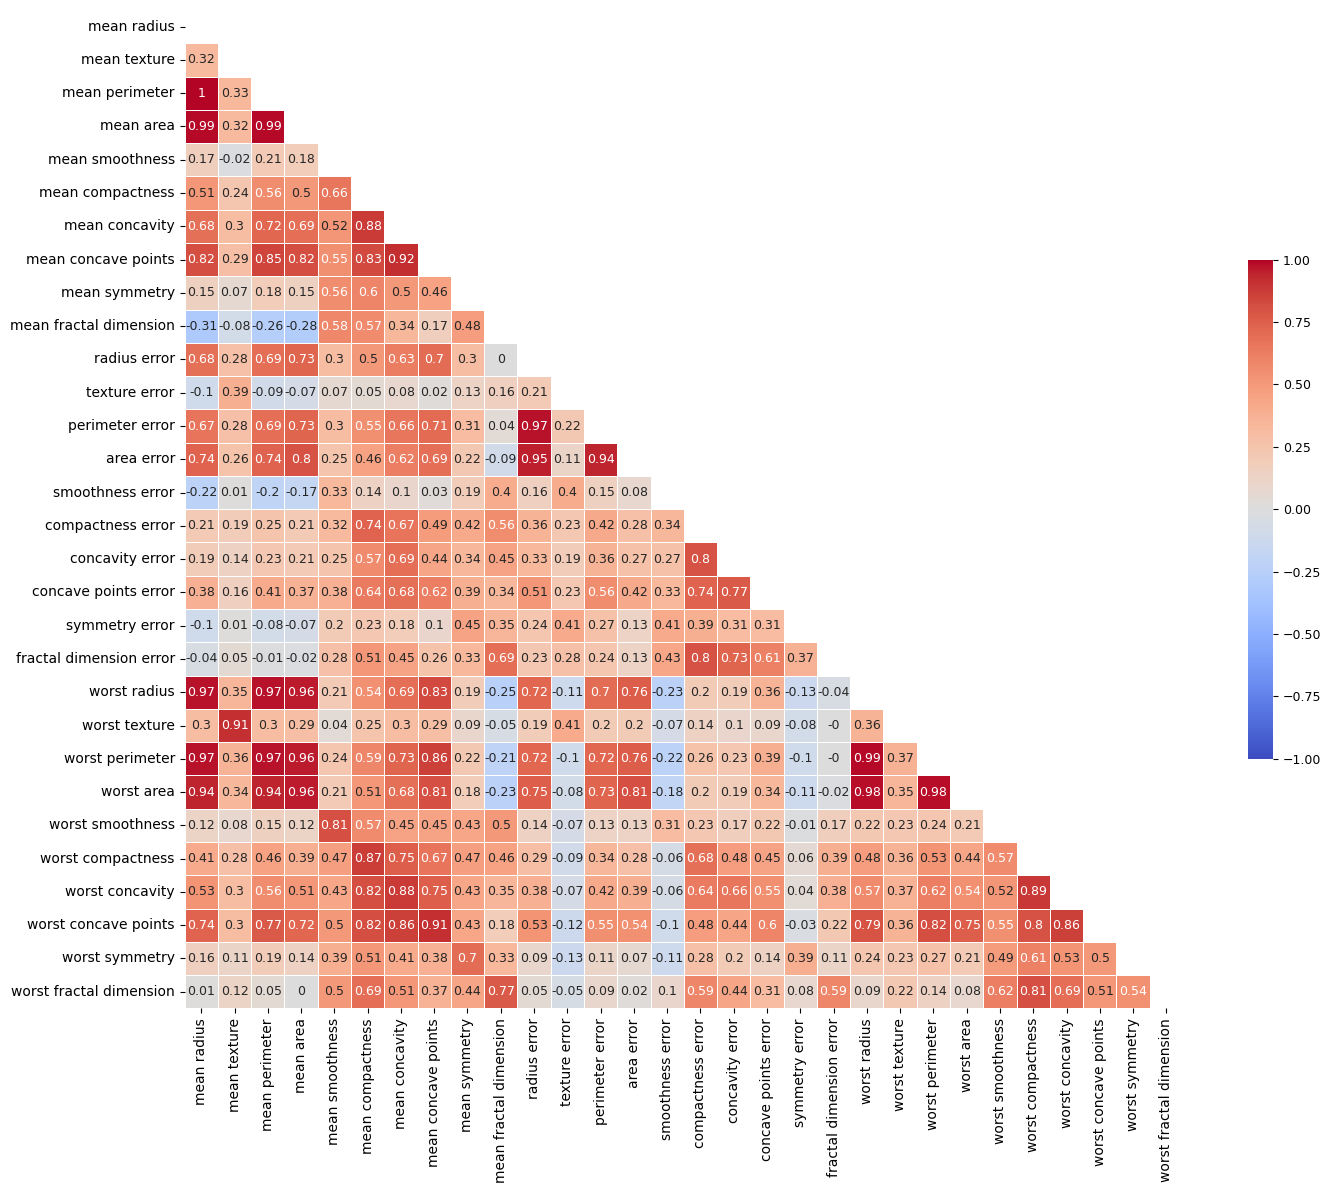

In [ ]:
# Correlação entre Atributos
corr = df.drop(columns = ['target']).corr().round(2)

# Pegando o upper triangule para mascarar ele no gráfico, ou seja, só aparecer o triângulo inferior do heatmap
mask = np.triu(np.ones_like(corr))

fig, ax = plt.subplots(figsize = (15, 12))

# Mudando o tamanho da fonte do número dentro da célula
plt.rcParams.update({'font.size': 9})

sns.heatmap(corr, vmin = -1, vmax = 1, annot = True, center = 0, mask = mask, linewidth = .5, square = True, cmap = 'coolwarm', cbar_kws = {'shrink': .5})

plt.tight_layout()

De forma rápida, podemos ver que os atributos worst "X" e mean "X" tem uma correlação alta entre si. De fato, uma motra a pior medida do atributo na observação e o outro mostra a média do atributo na observação.

Vou selecionar em um primeiro momento, somente os atributos mean.

In [ ]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
df_novo = df.drop(columns = ['worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'])

df_novo.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0


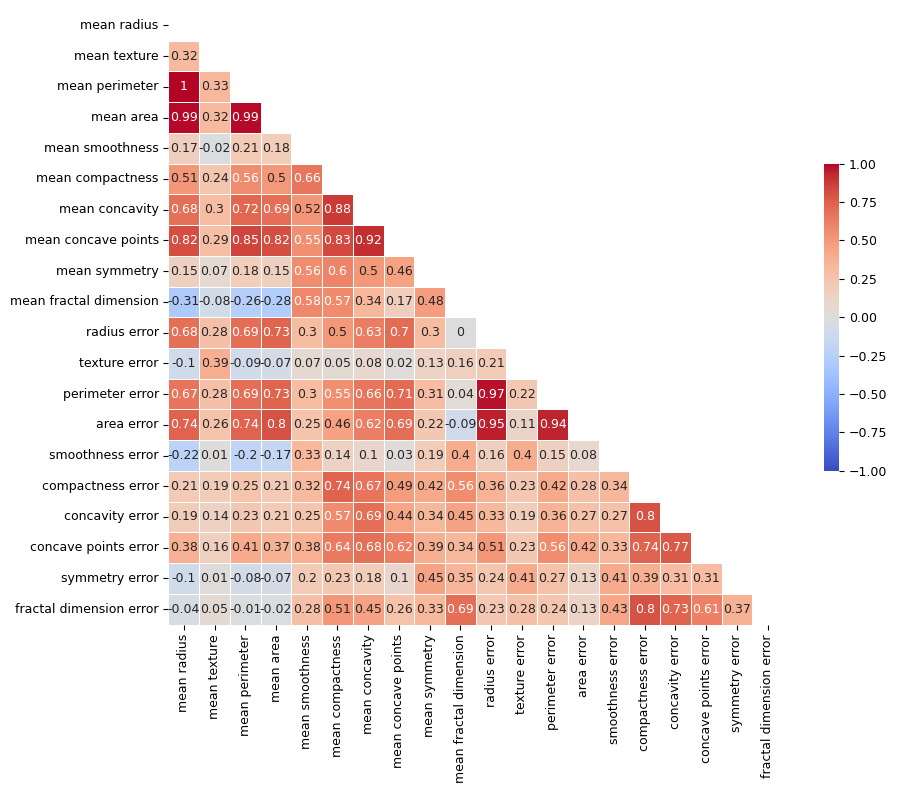

In [ ]:
# Correlação entre Atributos
corr = df_novo.drop(columns = ['target']).corr().round(2)

# Pegando o upper triangule para mascarar ele no gráfico, ou seja, só aparecer o triângulo inferior do heatmap
mask = np.triu(np.ones_like(corr))

fig, ax = plt.subplots(figsize = (10, 8))

# Mudando o tamanho da fonte do número dentro da célula
plt.rcParams.update({'font.size': 9})

sns.heatmap(corr, vmin = -1, vmax = 1, annot = True, center = 0, mask = mask, linewidth = .5, square = True, cmap = 'coolwarm', cbar_kws = {'shrink': .5})

plt.tight_layout()

Agora, pode-se observar que o perímetro, a área e o raio são altamente correlacionados (tanto a média quanto o erro). Pensando no atributo que melhor vai representar os três, selecionamos o raio. Com o raio, conseguimos achar matematicamente o perímetro e a área.

Paralelamente, temos concavity, concave points e compactness altamente correlacionadas entre si. Nesse caso, não temos tanto conhecimento dos atributos para selecionar embasadamente algum para representar todos. Então, selecionaremos o que tem a menor correlação entre os três: compactness.

In [ ]:
df_novo.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'target'],
      dtype='object')

In [ ]:
df_novo = df_novo.drop(columns = ['mean perimeter', 'mean area', 'perimeter error', 'area error', 'mean concavity',
       'mean concave points','concavity error', 'concave points error'])

df_novo.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,symmetry error,fractal dimension error,target
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193,0
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532,0
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571,0
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208,0
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115,0


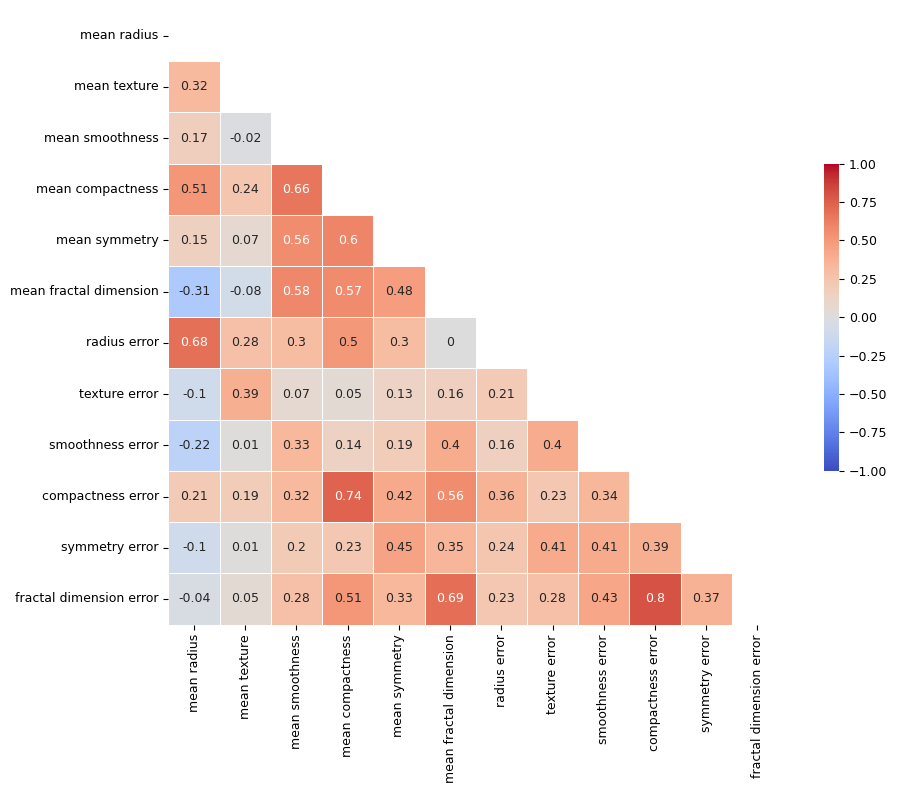

In [ ]:
# Correlação entre Atributos
corr = df_novo.drop(columns = ['target']).corr().round(2)

# Pegando o upper triangule para mascarar ele no gráfico, ou seja, só aparecer o triângulo inferior do heatmap
mask = np.triu(np.ones_like(corr))

fig, ax = plt.subplots(figsize = (10, 8))

# Mudando o tamanho da fonte do número dentro da célula
plt.rcParams.update({'font.size': 9})

sns.heatmap(corr, vmin = -1, vmax = 1, annot = True, center = 0, mask = mask, linewidth = .5, square = True, cmap = 'coolwarm', cbar_kws = {'shrink': .5})

plt.tight_layout()

### Modelo
Após selecionar as variáveis, vamos separar o conjunto de dados em treino e teste.

Documentação: [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
scaler = StandardScaler()

# Selecionando as variáveis determinadas anteriormente
X = df_novo.drop(columns = ['target'])

# Selecionando o alvo
y = df_novo['target']

# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

# Normalizando os atributos
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Muito curiosamente o método de Regressão Logística do Scikit-Learn utiliza esse formato de y (numero_amostra, ). Então, não precisamos redimensionar.

In [ ]:
y.shape

(569,)

In [ ]:
# Chamando a função LogisticRegression()
logistic = LogisticRegression()

# Ajustando o modelo
logistic.fit(X_train, y_train)

# Predizendo a partir de um X_test
y_pred = logistic.predict(X_test)

### Métricas de Avaliação

Relembrando os conceitos:

*    Verdadeiro positivo (true positive — TP): Por exemplo, quando o paciente tem câncer de mama maligno e o modelo classifica como tendo câncer maligno.

*    Falso positivo (false positive — FP): Por exemplo, quando o paciente não tem câncer de mama maligno e o modelo classifica como tendo câncer maligno.

*    Falso negativo (false negative — TN): Por exemplo, quando o paciente tem câncer de mama maligno e o modelo classifica como não tendo câncer maligno.

*    Verdadeiro negativo (true negative — FN): Por exemplo, quando o paciente não tem câncer de mama maligno e o modelo classifica como não tendo câncer maligno.

Diferentemente da regressão em que usamos R², em classificação nós usamos acurácia.

In [ ]:
acc_logistic = accuracy_score(y_test, y_pred)
print(acc_logistic)

0.9649122807017544


In [ ]:
# Imprimindo o relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.96      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



Elementos de relatório de classificação:

* Precision: pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos. Por exemplo, ao classificar uma ação como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos no processo.

* Recall: pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes no processo.

* F1 score: é simplesmente uma maneira de observar somente 1 métrica ao invés de duas (precisão e recall) em alguma situação. É uma média harmônica entre as duas, que está muito mais próxima dos menores valores do que uma média aritmética simples.

Documentação: [sklearn.metrics.precision_recall_fscore_support](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support)

Documentação: [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
print(confusion_matrix(y_test, y_pred))

print(f"True Positive: {confusion_matrix(y_test, y_pred)[0][0]}")
print(f"False Positive: {confusion_matrix(y_test, y_pred)[0][1]}")
print(f"False Negative: {confusion_matrix(y_test, y_pred)[1][0]}")
print(f"True Negative: {confusion_matrix(y_test, y_pred)[1][1]}")

[[36  3]
 [ 1 74]]
True Positive: 36
False Positive: 3
False Negative: 1
True Negative: 74


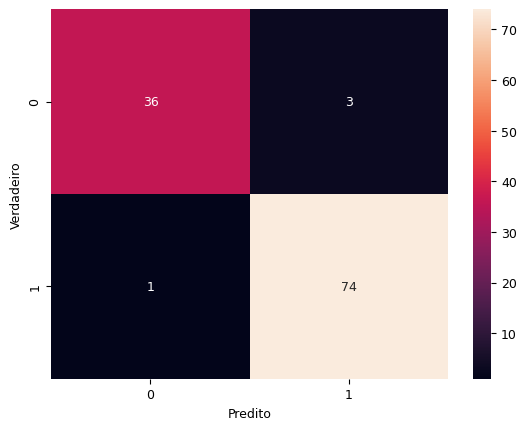

In [ ]:
fig, ax = plt.subplots()

ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

ax.set(ylabel = "Verdadeiro", xlabel = "Predito")

plt.show()

## KNN

Utilizaremos o mesmo dataset de câncer e os mesmos atributos selecionados.

O procedimento para realizar um KNN é bem similar dos procedimentos anteriores:

1. Ajustamos o modelo;
2. Predizemos o y a partir de um x de teste;
3. Avaliamos a acurácia do modelo (acurácia, classification report, confusion matrix).

Documentação: [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

### K = 1

In [ ]:
# Importando a função
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors= 1)

knn1.fit(X_train, y_train)

y_predk1 = knn1.predict(X_test)

In [ ]:
acc_knn1 = accuracy_score(y_test, y_predk1)
print(acc_knn1)

0.9473684210526315


In [ ]:
print(classification_report(y_test, y_predk1))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93        39
           1       0.99      0.93      0.96        75

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



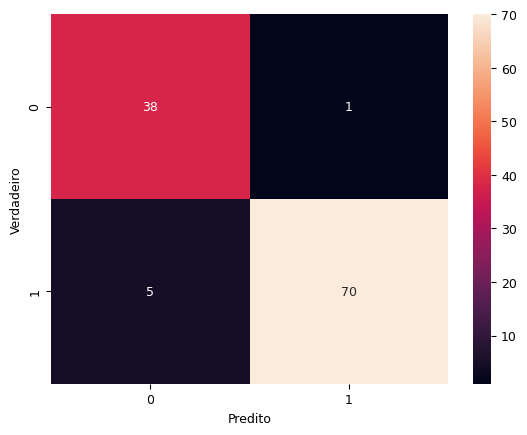

In [ ]:
fig, ax = plt.subplots()

ax = sns.heatmap(confusion_matrix(y_test, y_predk1), annot = True)

ax.set(ylabel = "Verdadeiro", xlabel = "Predito")

plt.show()

### K = 3

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors= 3)

knn3.fit(X_train, y_train)

y_predk3 = knn3.predict(X_test)

In [ ]:
acc_knn3 = accuracy_score(y_test, y_predk3)
print(acc_knn3)

0.9298245614035088


In [ ]:
print(classification_report(y_test, y_predk3))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.94      0.96      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



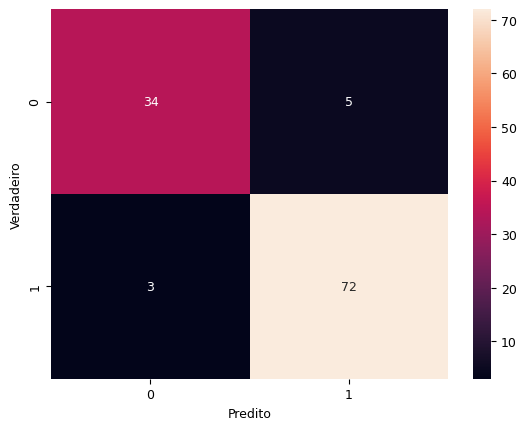

In [ ]:
fig, ax = plt.subplots()

ax = sns.heatmap(confusion_matrix(y_test, y_predk3), annot = True)

ax.set(ylabel = "Verdadeiro", xlabel = "Predito")

plt.show()

### K = 5

In [ ]:
# O default do KNClassifier é k = 5
knn5 = KNeighborsClassifier()

knn5.fit(X_train, y_train)

y_predk5 = knn5.predict(X_test)

In [ ]:
acc_knn5 = accuracy_score(y_test, y_predk5)
print(acc_knn5)

0.9298245614035088


In [ ]:
print(classification_report(y_test, y_predk5))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



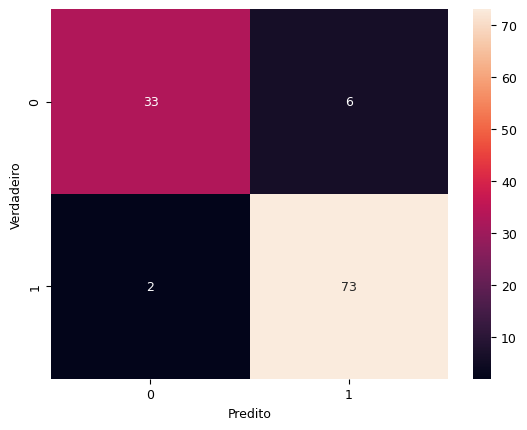

In [ ]:
fig, ax = plt.subplots()

ax = sns.heatmap(confusion_matrix(y_test, y_predk5), annot = True)

ax.set(ylabel = "Verdadeiro", xlabel = "Predito")

plt.show()

# Métodos de Reamostragem


## Abordagem de Conjunto de Validação

Essa estratégia consiste em aleatoriamente dividir as observações disponíveis em duas partes, o conjunto de treinamento e o validation set ou hold-out set. O modelo é ajustado com conjunto de treino e, então, o modelo é usado para predizer as respostas para as observações no conjunto de validação.

Desde que introduzimos as ferramentas de machine learning em Python, estamos utilizando o comando `train_test_split()`, o qual separa os dados em treinamento e teste. Apesar do conjunto de teste não ter o nome validation set ou hold-out set, ele é - em essência - a mesma coisa.

## Cross-Validation

Novamente, as funções que utilizaremos são da biblioteca `sklearn`.

Para utilizar o cross-validation, a abordagem é praticamente igual à anterior:

1. Pré-Processamento;
2. Seleção de Variáveis Preditoras e Alvo;
3. **Ajuste de Modelo, utilizando cross_val_score**;
4. Avaliação do Modelo.

Note que, diferentemente das abordagens anteriores, não iremos utilizar `train_test_split` para separar entre treino e teste. Dessa vez iremos utilizar a validação cruzada para realizar esse ajuste.

Documentação: [Cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

Documentação: [Cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate)

Documentação: [K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

Documentação: [LeaveOneOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)

### Importando Bibliotecas

Como já importamos as bibliotecas usuais (`pandas`, etc.), só iremos importar as funções que precisamos.

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression

### Dataset

Mais uma vez, utilizaremos um toy dataset para facilitar nosso pré-processamento do banco de dados.

O dataset, em questão, é o **diabetes dataset**.

Documentação: [load_diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
# Carregando o dicionário
diabetes = load_diabetes()

# Convert the dataset to a DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Add target variable to the DataFrame
diabetes_df['target'] = diabetes.target

diabetes_df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
# Descrição do Dataset
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Correlação entre Atributos

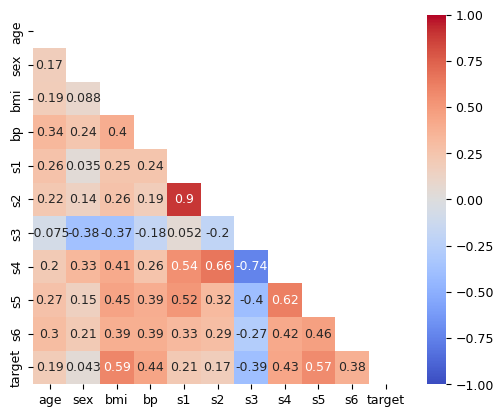

In [ ]:
corr = diabetes_df.corr()

mask = np.triu(np.ones_like(corr))

fig, ax = plt.subplots()

ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0,
                 cmap = 'coolwarm', annot = True,
                 square = True, mask = mask)

plt.show()

### Modelo

In [ ]:
X = diabetes_df.drop(columns = ['target'])
y = diabetes_df['target']

print(f"Formato de X: {X.shape}")
print(f"Formato de y: {y.shape}")

Formato de X: (442, 10)
Formato de y: (442,)


Como vamos utilizar a Regressão Linear, teremos que redimensionar y com `y.values.reshape(-1, 1)`.

In [ ]:
y = y.values.reshape(-1, 1)
y.shape

(442, 1)

In [ ]:
# Chamando o comando LinearRegression
linear = LinearRegression()

# Ajuste do modelo de regressão linear com validação cruzada de 5 camadas
cross = cross_val_score(estimator = linear, X = X, y = y, cv = 5)

# Imprimindo a métrica de avaliação de cada uma das camadas
print(cross)

# A média da métrica de avaliação
print(cross.mean())

[0.5561455  0.23055827 0.35357673 0.62190752 0.2658727  0.61819798
 0.41815142 0.43513747 0.43436229 0.68569253]
0.4619602420450601


Exemplo feito em sala de aula para demonstrar uma forma de encontrar o número de camadas ótimo para a validação cruzada:

In [ ]:
acuracia = []
melhor_k = 0
melhor_acuracia = 0
for i in range(2,100):
  # Chamando o comando LinearRegression
  linear = LinearRegression()

  # Ajuste do modelo de regressão linear com validação cruzada de 5 camadas
  cross = cross_val_score(estimator = linear, X = X, y = y, cv = i)

  # Imprimindo a métrica de avaliação de cada uma das camadas
  #print(cross)

  # A média da métrica de avaliação
  acuracia.append(cross.mean())

  if cross.mean() > melhor_acuracia:
    melhor_acuracia = cross.mean()
    melhor_k = i

In [ ]:
melhor_k

2

A função `cross_val_score` não permite mais de uma métrica de avaliação.

Então, caso queira mais métricas, utilize `cross_validate`.

In [ ]:
# Chamando o comando LinearRegression
linear = LinearRegression()

# Ajuste do modelo de regressão linear com validação cruzada de 5 camadas
cross = cross_validate(estimator = linear, X = X, y = y, cv = 5, scoring = ['r2', 'neg_mean_squared_error'])

# Imprimindo a métrica de avaliação de cada uma das camadas
print(cross)

# A média da métrica de avaliação
print(f"R²: \t{cross['test_r2'].mean()}")
print(f"MSE: \t{cross['test_neg_mean_squared_error'].mean()}")

{'fit_time': array([0.00732136, 0.00546837, 0.00531387, 0.00612307, 0.00547719]), 'score_time': array([0.00379419, 0.00339913, 0.00422502, 0.00407839, 0.00350595]), 'test_r2': array([0.42955615, 0.52259939, 0.48268054, 0.42649776, 0.55024834]), 'test_neg_mean_squared_error': array([-2779.92344921, -3028.83633883, -3237.6875877 , -3008.74648884,
       -2910.21268776])}
R²: 	0.48231643590864215
MSE: 	-2993.0813104693307


In [ ]:
print(f"Tempo para ajustar os modelos: \t\t{cross['fit_time'].sum()}")
print(f"Tempo para calcular as métricas: \t{cross['score_time'].sum()}")

Tempo para ajustar os modelos: 		0.029703855514526367
Tempo para calcular as métricas: 	0.019002676010131836


## Leave-One-Out Cross Validation

In [ ]:
from sklearn.model_selection import LeaveOneOut

# Chamando o comando LinearRegression
linear = LinearRegression()

# Chamando o método de reamostragem
cv = LeaveOneOut()

# Ajuste do modelo de regressão linear com LOOCV
cross = cross_validate(estimator = linear, X = X, y = y, cv = cv, scoring = ['neg_mean_squared_error'])

# Imprimindo a métrica de avaliação de cada uma das camadas
print(cross)

# A média da métrica de avaliação
print(f"MSE: \t{cross['test_neg_mean_squared_error'].mean()}")

{'fit_time': array([0.00643015, 0.00444603, 0.00316834, 0.0029974 , 0.00296068,
       0.0030129 , 0.00446939, 0.00326586, 0.00375533, 0.00433874,
       0.00334954, 0.0031569 , 0.00314212, 0.00312662, 0.00311804,
       0.0029788 , 0.00344634, 0.00332236, 0.00314617, 0.00298572,
       0.00301933, 0.00372529, 0.00330114, 0.00290155, 0.00375319,
       0.00449991, 0.00364995, 0.00292563, 0.00289154, 0.0028317 ,
       0.0027914 , 0.00302196, 0.00311184, 0.00305033, 0.00291133,
       0.00291324, 0.00286722, 0.0028758 , 0.00304604, 0.00289655,
       0.00305653, 0.00310063, 0.00291753, 0.00311899, 0.00299478,
       0.00294995, 0.00390148, 0.00319576, 0.0031631 , 0.00477195,
       0.00470638, 0.0048418 , 0.00488281, 0.00479221, 0.00323057,
       0.00348997, 0.00436068, 0.00327277, 0.00297189, 0.00289273,
       0.00282907, 0.00314236, 0.00314379, 0.00452876, 0.00320196,
       0.00315166, 0.00305963, 0.00316715, 0.0030539 , 0.00315022,
       0.00323486, 0.00314784, 0.00305533, 0.0031

In [ ]:
print(f"Tempo para ajustar os modelos: \t{cross['fit_time'].sum()}")
print(f"Tempo para calcular os MSE: \t{cross['score_time'].sum()}")

Tempo para ajustar os modelos: 	1.4884531497955322
Tempo para calcular os MSE: 	0.7688858509063721


## Bootstrap

O bootstrap, em termos simples, é uma forma de termos mais amostras sem coletar novas amostras da população.

Existem várias formas de utilizar o bootstrap, mas a que vamos focar é o método `resample` do `scikit-learn`.

Documentação: [resample](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html)

### Importando Bibliotecas

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import r2_score

### Dataset

Vamos utilizar o banco de dados de [Vôlei](https://docs.google.com/spreadsheets/d/1bmr8k5C7juVLMOqA0K43gYHLol0AB3Ar/edit?usp=sharing&ouid=112041259123429663700&rtpof=true&sd=true), que vimos em aulas passadas.

In [ ]:
from google.colab import drive
mount.drive('/content/drive')

In [ ]:
volei = pd.read_excel('/content/drive/MyDrive/Cópia de 2019volleyball.xlsx')
volei.head()

,Nome,Ranking Geral,Ranking em 2020,Nacionalidade,Posição,Data de Nascimento,Altura (cm),Peso (kg),Salto (cm),Bloqueio (cm),Mão Dominante,Pontos do país,Pontos
0,Ting Zhu,3,23,China,Outside Hitter,1994-11-29,198,78,327,305,Right,320.0,1190.0
1,Macris Carneiro,176,19,Brazil,Setter,1989-03-03,178,68,292,285,NaN,220.0,833.0
2,Gabriela GuimarÃ£es,31,13,Brazil,Outside Hitter,1994-05-19,180,65,305,289,Right,220.0,788.0
3,Tijana BoÅ¡koviÄ,28,3,Serbia,Opposite,1997-03-08,194,84,329,310,Left,252.0,630.5
4,Paola Egonu,134,2,Italy,Opposite,1998-12-18,190,70,336,315,Right,165.0,597.0


In [ ]:
print(len(volei))

30


Perceba que essa amostra tem 30 observações: muito pouco para fazer um modelo de confiança.

### Seleção de Atributos

Pensando no heatmap da [Prática 3](https://colab.research.google.com/drive/1MpMM3K9QMfAoVBrTmGYU7AuAEz8dT02-?usp=sharing), escolheremos as mesmas variáveis: peso e altura.

### Modelo

No exemplo abaixo, utilizamos o bootstrap para aumentar o meu número de amostras de teste, mas poderíamos utilizar para aumentar o número de treinamento ou os dois.

In [ ]:
X = volei['Peso (kg)']
y = volei['Altura (cm)']

# Redimensionando X e y
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# Separando entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)


# Ajuste do modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predições Bootstrap
r2 = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    # Predição
    y_predb = model.predict(X_bs)
    # Avaliando o modelo
    score = r2_score(y_bs, y_predb)
    r2.append(score)

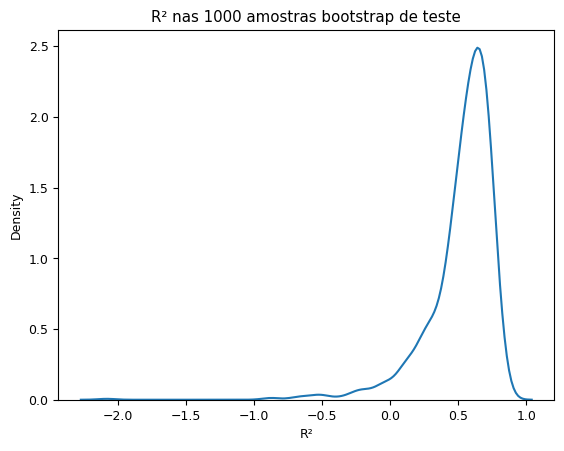

In [ ]:
sns.kdeplot(r2)
plt.title("R² nas 1000 amostras bootstrap de teste")
plt.xlabel("R²")
plt.show()

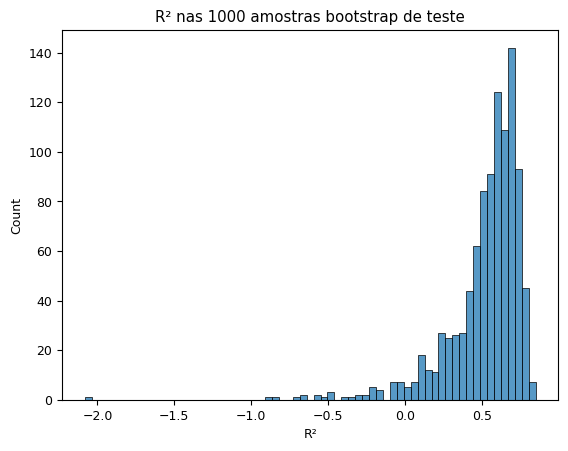

In [ ]:
sns.histplot(r2)
plt.title("R² nas 1000 amostras bootstrap de teste")
plt.xlabel("R²")
plt.show()

# Referências
VELOSO, Yago. Aula 4: Classificação. Github, 2022. Disponível em [Aula 4](https://github.com/yagomsv/aulas_ciencia_de_dados_UFBA/blob/main/Aula_4_Classifica%C3%A7%C3%A3o.ipynb). Acesso em 15 mai. 2024.

CARPENTRIES INCUBATOR. Bootstrapping. Github, 2024. Disponível em [Bootstrapping](https://carpentries-incubator.github.io/machine-learning-novice-python/07-bootstrapping/index.html). Acesso em 15 mai. 2024.

PEDREGOSA, F; *et al*. Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, v.12, pp.2825-2830, 2011.